In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")
%matplotlib inline

from datetime import datetime
import time

In [2]:
#### Topic: Predict the 2018 Finishers Boston Marathon

In [3]:
# Motivation:
## 1. Is there specific age, gender and country that able to finish Boston marathon?
## 2. Who will be the top 3 finishers of 2018 Boston marathon statistically by age, gender and country?

In [4]:
## Feedback:
### create a decision tree model to predict whether  a runner will finish the race.
### identify the target column. 
### check if the target column has class imbalance, if yes, please use smote-tomek to re-balance the dataset.

In [5]:
### Project4 - Part 2: Brief
### Perform EDA on your dataset:
#### 1. Statistical analysis, along with any visualizations.
#### 2. Determine how to handle sampling or missing values.
#### 3. Clearly identify shortcomings, assumptions, and next steps.

In [6]:
# load boston data
marathon = pd.read_csv('.\data\marathon_results_2017.csv', index_col=0)

In [7]:
# df.loc[row_indexer,column_indexer]
# .apply() = Apply a function along an axis of the DataFrame.
# to_timedelta = Convert argument to timedelta
marathon.iloc[:, 9:20] = marathon.iloc[:, 9:20].apply(pd.to_timedelta)

In [8]:
marathon.describe()

,Age,5K,10K,15K,20K,Half,25K,30K,35K,40K,Pace,Proj Time,Overall,Gender,Division
count,26410.000000,26410,26410,26410,26410,26410,26410,26410,26410,26410,26410,26410,26410.000000,26410.000000,26410.000000
mean,42.587732,0 days 00:25:31.962968,0 days 00:51:07.235138,0 days 01:17:21.580461,0 days 01:44:30.899280,0 days 01:50:25.843468,0 days 02:12:34.802044,0 days 02:42:21.125255,0 days 03:13:32.695910,0 days 03:44:40.938129,0 days 00:09:05.277167,0 days 00:00:00,13206.260091,6660.973230,1588.796706
std,11.419467,0 days 00:04:03.447330,0 days 00:08:20.991642,0 days 00:12:30.331864,0 days 00:17:37.973902,0 days 00:18:28.396339,0 days 00:23:13.574798,0 days 00:28:52.314309,0 days 00:34:54.248563,0 days 00:40:05.537900,0 days 00:01:36.454296,0 days 00:00:00,7624.370496,3910.031525,1423.199500
min,18.000000,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:04:57,0 days 00:00:00,1.000000,1.000000,1.000000
25%,34.000000,0 days 00:22:41,0 days 00:45:26,0 days 01:08:40,0 days 01:32:31,0 days 01:37:42,0 days 01:56:50,0 days 02:22:24,0 days 02:49:15,0 days 03:16:34,0 days 00:07:57,0 days 00:00:00,6604.250000,3302.250000,502.000000
50%,43.000000,0 days 00:25:04,0 days 00:50:11,0 days 01:15:45,0 days 01:42:05,0 days 01:47:47,0 days 02:09:06,0 days 02:38:04,0 days 03:08:25,0 days 03:38:39,0 days 00:08:51,0 days 00:00:00,13206.500000,6603.500000,1154.000000
75%,51.000000,0 days 00:27:45,0 days 00:55:33,0 days 01:23:57,0 days 01:53:32,0 days 01:59:53.750000,0 days 02:24:37,0 days 02:57:48,0 days 03:32:32.750000,0 days 04:06:59,0 days 00:10:00,0 days 00:00:00,19808.750000,9904.750000,2190.750000
max,84.000000,0 days 00:54:14,0 days 01:45:22,0 days 02:32:36,0 days 03:23:25,0 days 03:36:24,0 days 04:27:14,0 days 05:37:13,0 days 06:39:07,0 days 07:41:23,0 days 00:18:15,0 days 00:00:00,26411.000000,14438.000000,5846.000000


In [9]:
marathon.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26410 entries, 0 to 26409
Data columns (total 24 columns):
Bib              26410 non-null object
Name             26410 non-null object
Age              26410 non-null int64
M/F              26410 non-null object
City             26410 non-null object
State            22815 non-null object
Country          26410 non-null object
Citizen          1254 non-null object
Unnamed: 9       91 non-null object
5K               26410 non-null timedelta64[ns]
10K              26410 non-null timedelta64[ns]
15K              26410 non-null timedelta64[ns]
20K              26410 non-null timedelta64[ns]
Half             26410 non-null timedelta64[ns]
25K              26410 non-null timedelta64[ns]
30K              26410 non-null timedelta64[ns]
35K              26410 non-null timedelta64[ns]
40K              26410 non-null timedelta64[ns]
Pace             26410 non-null timedelta64[ns]
Proj Time        26410 non-null timedelta64[ns]
Official Time    

Text(0.5,1,'Participants per age group')

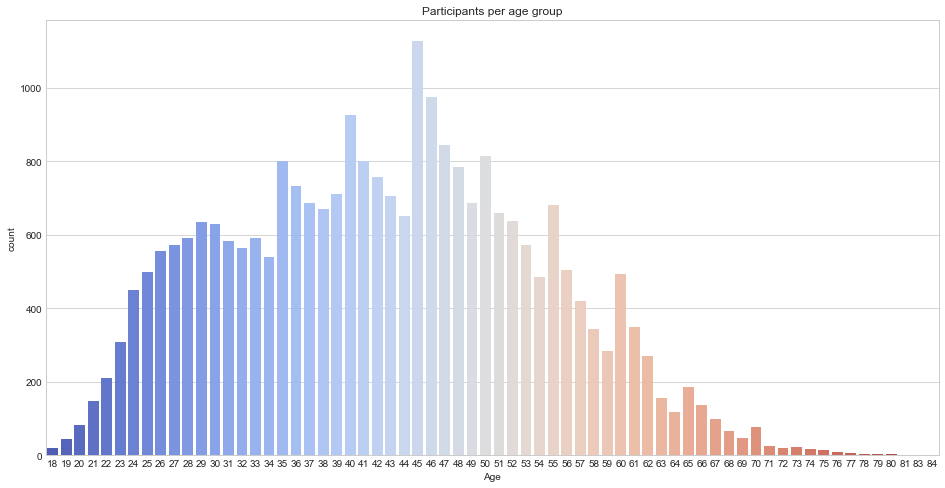

In [10]:
# seaborn.countplot() = Show the counts of observations in each categorical bin using bars.
run = sns.countplot('Age', data=marathon, palette="coolwarm")
# .set_size_inches() = Set the figure size in inches.
# .figure = control the default spacing of the subplots
run.figure.set_size_inches(16,8)
run.set_title("Participants per age group")
# Finishers by age

Text(0.5,1,'Participants per Age & Gender')

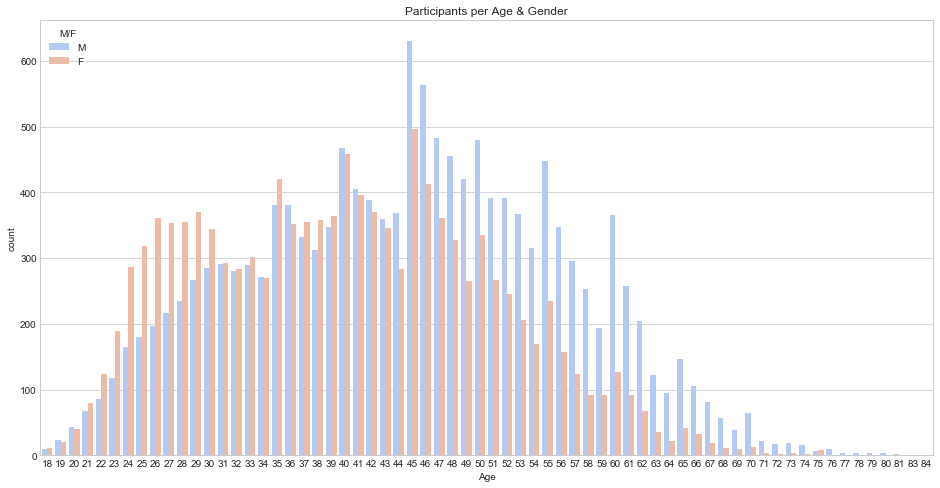

In [11]:
run = sns.countplot('Age', data=marathon, palette="coolwarm", hue='M/F')
run.figure.set_size_inches(16,8)
run.set_title("Participants per Age & Gender")
# Finishers by age and gender

Text(0.5,1,'Distribution of finish times per Age group')

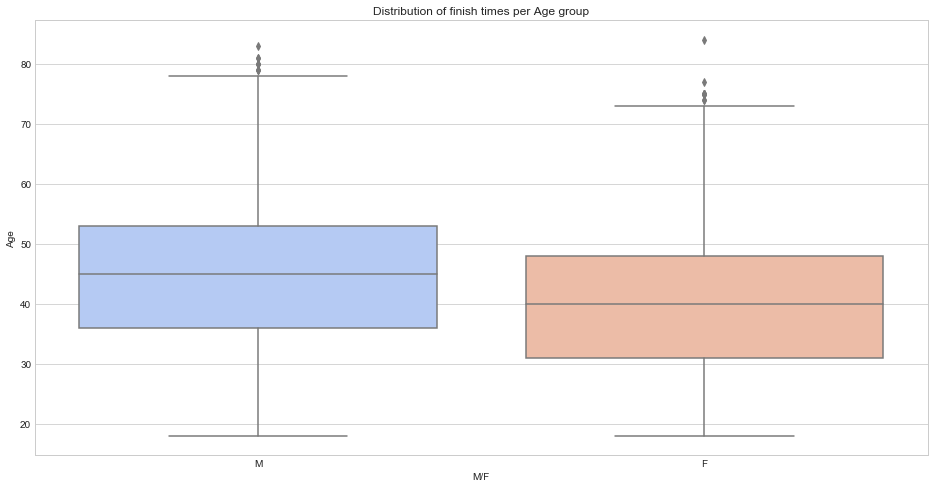

In [12]:
run = sns.boxplot(marathon['M/F'], marathon['Age'], palette="coolwarm")
run.figure.set_size_inches(16,8)
run.set_title("Distribution of finish times per Age group")
# Boxplot by age and gender

In [13]:
# run = sns.jointplot( x=marathon['Official Time'].apply(lambda x: x.total_seconds()/3600), y=marathon['Age'], stat_func=None, kind='hex', color="r", size=12)

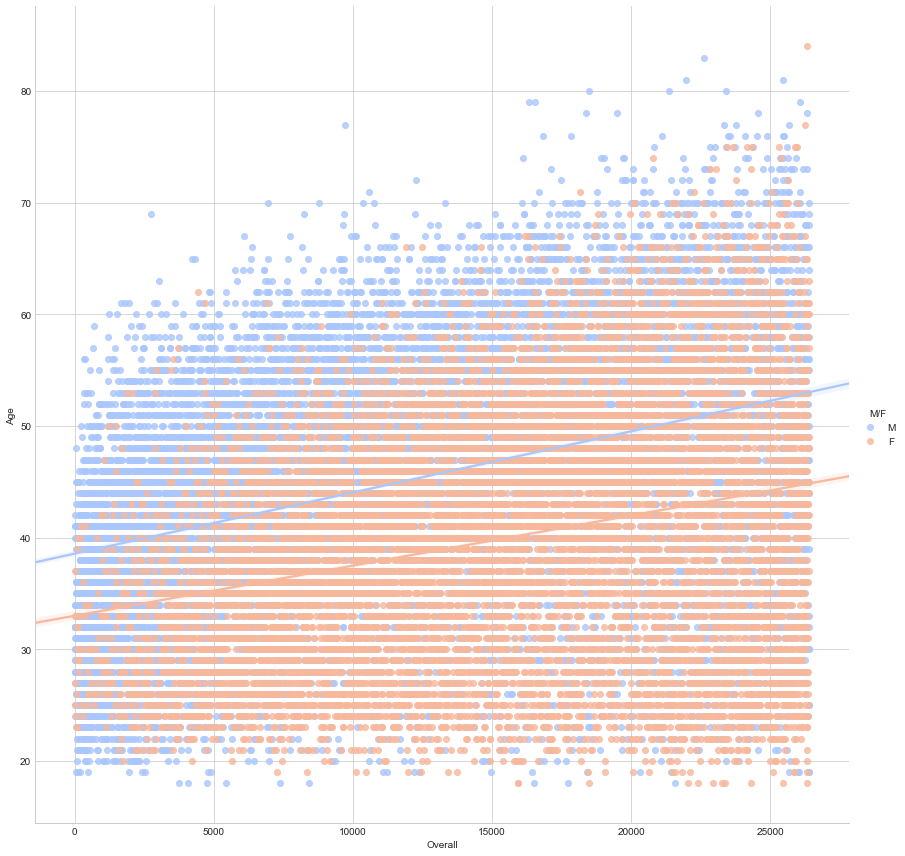

In [14]:
# .lmplot() = Plot data and regression model fits across a FacetGrid.
run = sns.lmplot(x='Overall', y='Age', data=marathon, hue='M/F', palette="coolwarm", size=12)
# Overall placement by age and gender

Text(0.5,1,'Most popular Country')

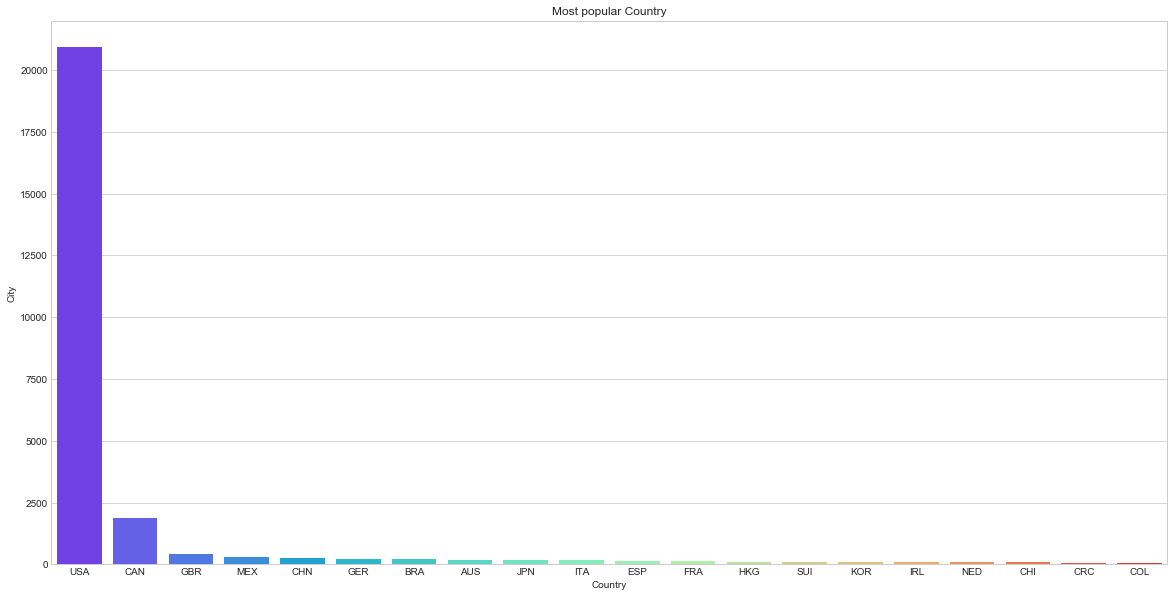

In [15]:
m = marathon.groupby('Country').count()['City'].sort_values(ascending=False).head(20)
run = sns.barplot(m.index, m, palette='rainbow')
run.figure.set_size_inches(20,10)
run.set_title("Most popular Country")

In [16]:
# Verify we are not missing any data
marathon.isnull().sum()

Bib                  0
Name                 0
Age                  0
M/F                  0
City                 0
State             3595
Country              0
Citizen          25156
Unnamed: 9       26319
5K                   0
10K                  0
15K                  0
20K                  0
Half                 0
25K                  0
30K                  0
35K                  0
40K                  0
Pace                 0
Proj Time            0
Official Time        0
Overall              0
Gender               0
Division             0
dtype: int64

In [17]:
marathon.head()

,Bib,Name,Age,M/F,City,State,Country,Citizen,Unnamed: 9,5K,...,25K,30K,35K,40K,Pace,Proj Time,Official Time,Overall,Gender,Division
0,11,"Kirui, Geoffrey",24,M,Keringet,NaN,KEN,NaN,NaN,00:15:25,...,01:16:59,01:33:01,01:48:19,02:02:53,00:04:57,0 days,2:09:37,1,1,1
1,17,"Rupp, Galen",30,M,Portland,OR,USA,NaN,NaN,00:15:24,...,01:16:59,01:33:01,01:48:19,02:03:14,00:04:58,0 days,2:09:58,2,2,2
2,23,"Osako, Suguru",25,M,Machida-City,NaN,JPN,NaN,NaN,00:15:25,...,01:17:00,01:33:01,01:48:31,02:03:38,00:04:59,0 days,2:10:28,3,3,3
3,21,"Biwott, Shadrack",32,M,Mammoth Lakes,CA,USA,NaN,NaN,00:15:25,...,01:17:00,01:33:01,01:48:58,02:04:35,00:05:03,0 days,2:12:08,4,4,4
4,9,"Chebet, Wilson",31,M,Marakwet,NaN,KEN,NaN,NaN,00:15:25,...,01:16:59,01:33:01,01:48:41,02:05:00,00:05:04,0 days,2:12:35,5,5,5


In [18]:
# Sort the DataFrame by "Age" and display the NumPy array.
marathon.sort_values(by='Age', ascending=True).values[0:5]

array([['26356', 'Fried, Lucas A.', 18, 'M', 'Wayland', 'MA', 'USA', nan,
        nan, Timedelta('0 days 00:30:25'), Timedelta('0 days 00:59:53'),
        Timedelta('0 days 01:28:11'), Timedelta('0 days 01:57:49'),
        Timedelta('0 days 02:04:00'), Timedelta('0 days 02:26:58'),
        Timedelta('0 days 02:56:59'), Timedelta('0 days 03:27:37'),
        Timedelta('0 days 03:57:28'), Timedelta('0 days 00:09:33'),
        Timedelta('0 days 00:00:00'), '4:10:23', 17737, 10628, 3841],
       ['28542', 'Blake, Meghan E.', 18, 'F', 'Needham', 'MA', 'USA',
        nan, nan, Timedelta('0 days 00:32:44'),
        Timedelta('0 days 01:05:00'), Timedelta('0 days 01:37:15'),
        Timedelta('0 days 02:09:43'), Timedelta('0 days 02:16:44'),
        Timedelta('0 days 02:42:12'), Timedelta('0 days 03:17:28'),
        Timedelta('0 days 03:54:05'), Timedelta('0 days 04:31:57'),
        Timedelta('0 days 00:10:59'), Timedelta('0 days 00:00:00'),
        '4:47:48', 22940, 10047, 4939],
       ['4496

In [19]:
# Mean of Age, grouped by Country.
marathon.groupby(by='Country', axis=0).Age.mean()

Country
ALG    54.500000
AND    58.000000
ARG    47.250000
AUS    44.717277
AUT    48.227273
BAR    54.000000
BDI    32.000000
BEL    46.285714
BER    43.666667
BRA    43.907317
BRN    27.000000
BUL    42.000000
CAN    46.358824
CAY    39.833333
CHI    43.986301
CHN    45.909091
COL    43.983607
CRC    39.555556
CRO    50.200000
CZE    47.363636
DEN    45.183333
DOM    45.333333
ECU    43.250000
EGY    39.500000
ESA    45.833333
ESP    45.348485
EST    45.333333
ETH    28.400000
FIN    48.000000
FLK    34.000000
         ...    
NGR    44.000000
NOR    46.953488
NZL    48.617647
PAN    40.500000
PAR    63.000000
PER    41.656250
PHI    44.600000
POL    46.343750
POR    47.625000
ROU    45.000000
RSA    49.294118
RUS    38.586207
SIN    43.700000
SLO    47.857143
SMR    39.000000
SRB    38.000000
SUI    45.948454
SVK    49.666667
SWE    47.081967
TCA    46.000000
THA    47.000000
TRI    43.000000
TUR    42.400000
TWN    44.092593
UAE    45.714286
UKR    34.500000
URU    51.600000
USA   

In [20]:
# Mean of all numeric columns, grouped by Country.
marathon.groupby('Country').mean()

,Age,Overall,Gender,Division
Country,,,,
ALG,54.500000,10845.000000,7471.000000,701.500000
AND,58.000000,10229.000000,7272.000000,457.000000
ARG,47.250000,11015.138889,6118.888889,872.361111
AUS,44.717277,11759.471204,6256.319372,1324.115183
AUT,48.227273,13211.590909,7584.500000,1239.818182
BAR,54.000000,13851.250000,4921.500000,145.500000
BDI,32.000000,75.000000,9.000000,9.000000
BEL,46.285714,15165.595238,7937.785714,1439.333333
BER,43.666667,8948.333333,4788.000000,1213.000000


In [21]:
# describe() all numeric columns, grouped by Country.
marathon.groupby('Country').describe()

10K                                                  \
         count                    mean                     std   
Country                                                          
ALG          2  0 days 00:48:40.500000  0 days 00:01:08.589357   
AND          1         0 days 00:45:41                     NaT   
ARG         36  0 days 00:48:52.500000  0 days 00:05:13.301178   
AUS        191  0 days 00:48:52.612565  0 days 00:06:44.860491   
AUT         22  0 days 00:51:53.272727  0 days 00:09:16.862057   
BAR          4         0 days 00:54:50  0 days 00:00:51.717179   
BDI          1         0 days 00:34:58                     NaT   
BEL         42  0 days 00:53:32.690476  0 days 00:08:27.881803   
BER          3         0 days 00:46:39  0 days 00:07:42.734264   
BRA        205  0 days 00:48:37.912195  0 days 00:07:10.355327   
BRN          1         0 days 00:34:58                     NaT   
BUL          1         0 days 00:44:48                     NaT   
CAN       1870  0 days 00:49:36.274331  0 days 00:07:06.385264   
CAY          6  0 days 00:45:51.166666  0 days 00:04:27.195371   
CHI         73  0 days 00:47:04.041095  0 days 00:05:16.816781   
CHN        242  0 days 00:52:10.582644  0 days 00:08:14.359860   
COL         61  0 days 00:44:11.672131  0 days 00:04:32.419879   
CRC         63  0 days 00:44:59.396825  0 days 00:05:24.837802   
CRO          5  0 days 00:49:09.600000  0 days 00:07:02.450943   
CZE         11  0 days 00:47:49.909090  0 days 00:06:13.440076   
DEN         60  0 days 00:49:52.933333  0 days 00:08:28.785222   
DOM          9         0 days 00:45:47  0 days 00:08:47.245199   
ECU          8  0 days 00:48:18.750000  0 days 00:04:14.283166   
EGY          2         0 days 00:44:22  0 days 00:14:49.540330   
ESA          6         0 days 00:47:50  0 days 00:02:36.967512   
ESP        132  0 days 00:50:35.469696  0 days 00:07:05.693102   
EST          9  0 days 00:46:04.888888  0 days 00:05:41.802005   
ETH          5         0 days 00:33:10  0 days 00:02:28.342509   
FIN         15  0 days 00:47:17.200000  0 days 00:05:15.799936   
FLK          1         0 days 00:42:07                     NaT   
...        ...                     ...                     ...   
NGR          1         0 days 01:03:33                     NaT   
NOR         43  0 days 00:49:09.627906  0 days 00:08:20.924194   
NZL         34  0 days 00:55:21.058823  0 days 00:10:05.632198   
PAN          4  0 days 00:41:44.250000  0 days 00:03:24.380975   
PAR          1         0 days 00:52:28                     NaT   
PER         32  0 days 00:45:29.718750  0 days 00:04:19.377571   
PHI         10  0 days 00:51:45.400000  0 days 00:06:10.212611   
POL         32  0 days 00:46:50.031250  0 days 00:04:51.564687   
POR         16         0 days 00:45:34  0 days 00:04:42.242212   
ROU          2         0 days 00:47:10  0 days 00:00:35.355339   
RSA         17  0 days 00:54:40.705882  0 days 00:11:40.958786   
RUS         29  0 days 00:46:08.827586  0 days 00:06:17.009574   
SIN         20  0 days 00:50:07.250000  0 days 00:10:24.883641   
SLO          7  0 days 00:46:40.142857  0 days 00:06:29.189940   
SMR          1         0 days 00:46:36                     NaT   
SRB          1         0 days 00:39:13                     NaT   
SUI         97  0 days 00:51:03.474226  0 days 00:07:37.270846   
SVK          6  0 days 00:52:28.500000  0 days 00:07:23.480213   
SWE         61  0 days 00:49:42.967213  0 days 00:07:31.095295   
TCA          1         0 days 00:54:08                     NaT   
THA          5  0 days 00:51:15.800000  0 days 00:08:03.676751   
TRI          1         0 days 00:53:14                     NaT   
TUR          5  0 days 00:48:18.400000  0 days 00:06:37.549116   
TWN         54  0 days 00:45:46.240740  0 days 00:05:20.103222   
UAE          7  0 days 00:49:40.571428  0 days 00:06:02.294013   
UKR          4         0 days 00:51:47  0 days 00:10:56.360165   
URU          5  0 days 01:04:34.800000  0 days 00:1

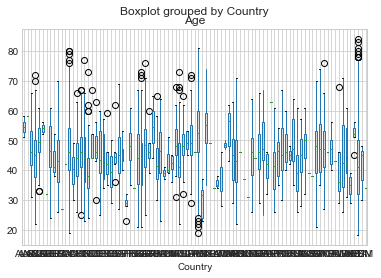

In [22]:
# Box plot of Age, grouped by Country.
marathon.boxplot(column='Age', by='Country');

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [24]:
n = marathon[['Proj Time', 'Pace']]

In [25]:
# split data into two
train_data, test_data = train_test_split(n, test_size=0.33)

In [26]:
x_train = train_data.drop("Proj Time", axis=1)
y_train = train_data["Proj Time"]

In [27]:
x_test = test_data.drop(["Proj Time"], axis=1)
y_test = test_data["Proj Time"]

In [28]:
# create and fit the forest
forest = RandomForestRegressor(n_estimators=100)
forest.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [29]:
# predict
y_pred = forest.predict(x_test)

In [30]:
# print the score
# forest_score = round(forest.score(x_test, y_test) * 100, 2)
# print(forest_score)

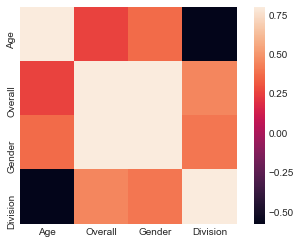

In [31]:
import seaborn as sns
corrmat = marathon.corr()

sns.heatmap(corrmat, vmax=.8, square=True);

In [32]:
marathon['run'] = marathon.Age.map({'Age':0, 'Gender':1, 'Country':2})

In [33]:
# Create feature matrix (X).
feature_cols = ['Age', 'Gender', 'Country']
X = marathon[feature_cols]

In [34]:
# Create response vector (y).
y = marathon.Age.map

In [35]:
# Using the Train/Test Split Procedure (K=1)
from sklearn import metrics

In [36]:
marathon.shape

(26410, 25)

In [37]:
# Split X and y into training and testing sets

# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99)
# create training and testing vars

X_train, X_test, y_train, y_test = train_test_split(marathon, X, test_size=0.33, random_state=0)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(17694, 25) (17694, 3)
(8716, 25) (8716, 3)


In [38]:
# Train the model on the training set
from sklearn.neighbors import KNeighborsClassifier

In [39]:
# knn = KNeighborsClassifier(n_neighbors=1)
# knn.fit(X_train, y_train)

In [40]:
### Final Project, Part 3: Technical Notebook
### Build and document a working model, prototype, 
### recommendation, or solution.
#### 1. A detailed Jupyter Notebook with a summary 
#### of your analysis, approach, and evaluation metrics.
#### 2. Clearly formatted structure 
#### with section headings and markdown descriptions.
#### 3. Comments explaining your code.
# Note: Here are some things to consider in your notebook: 
# sample size, correlations, feature importance, 
# unexplained variance or outliers, variable selection, 
# train/test comparison, and any relationships 
# between your target and independent variables.